# Importing necessary libraries

In [1]:
#for_dataframe_and_numerical_arrays
import numpy as np
import pandas as pd

#for_Visualizing
import seaborn as sn 
import matplotlib.pyplot as plt

#for_feature_engineering
from sklearn.feature_extraction.text import CountVectorizer

#for_train_test_split
from sklearn.model_selection import train_test_split

#MultinomialNB_selected_as_it's_a_efficient_way_for_a_text_based_model
from sklearn.naive_bayes import MultinomialNB

#As_there_is_class_imbalance_imporing_these_metrics_for_evaluation_
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix


# Reading Data
# Data from:
# https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [2]:
#encoding is used for reading the file in case there are invlide char like emoji,symbol
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
#droping_unnecessary_columns
df=df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#renaming_the_Columns
df.columns=['Target','Text']
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Preprocessing

<Axes: >

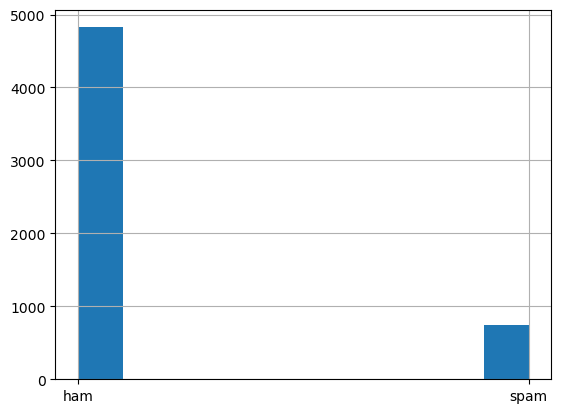

In [7]:
#checking_imbalance_class
df['Target'].hist()

In [8]:
# Checking_if_there_is_any_null_items
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [9]:
# Checking if there is any duplicate items
df.duplicated().sum()

403

In [10]:
#Fact:There is Duplicates,Removing these duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# Feature Engineering_part_1

In [11]:
#creating_binary_labels
df['b_labels']=df['Target'].map({'ham':0,'spam':1})
y=df['b_labels'].to_numpy()

# Train-Test Split

In [12]:
#spliting_the_data
df_train,df_test,y_train,y_test=train_test_split(df['Text'],y,test_size=0.2)

# Bag of Word Vectorization

In [13]:
#using_Bag_of_words
featurizer=CountVectorizer(decode_error='ignore')
Xtrain=featurizer.fit_transform(df_train)
Xtest=featurizer.transform(df_test)

In [14]:
Xtrain

<4135x7626 sparse matrix of type '<class 'numpy.int64'>'
	with 54539 stored elements in Compressed Sparse Row format>

# Multinomial naive Bayes

In [15]:
#creating_the_model
model=MultinomialNB()
model.fit(Xtrain,y_train)

MultinomialNB()

# Model Evaluation

==> Accuracy

# Class Imbalance

==>F1_score

==>AUC_ROC_score

==>plotting_Confusion_matrix

In [16]:
print("train_acc: ",model.score(Xtrain,y_train))
print("test_acc: ",model.score(Xtest,y_test))

train_acc:  0.9937122128174123
test_acc:  0.9825918762088974


# Experimenting_as_the_class_is_imbalanced_acc_may_not_be_best_to_use

In [17]:
#Calculating predicted probabilities for positive class (class 1) for train and test sets
prob_train= model.predict_proba(Xtrain)[:,1]
prob_test=model.predict_proba(Xtest)[:,1]

# AUC scores for train and test sets
print("train_AUC: ",roc_auc_score(y_train,prob_train))
print("test_AUC: ",roc_auc_score(y_test,prob_test))

train_AUC:  0.990523326572008
test_AUC:  0.9829256041377255


In [18]:
# using prediction to get f1 score
ptrain=model.predict(Xtrain)
ptest=model.predict(Xtest)

# F1 scores for train and test sets
print("train_F1 ",f1_score(y_train,ptrain))
print("test_F1 ",f1_score(y_test,ptest))

train_F1  0.974308300395257
test_F1  0.9366197183098592


# Plotting_Confusion_matrix

In [19]:
cm=confusion_matrix(y_train,ptrain)

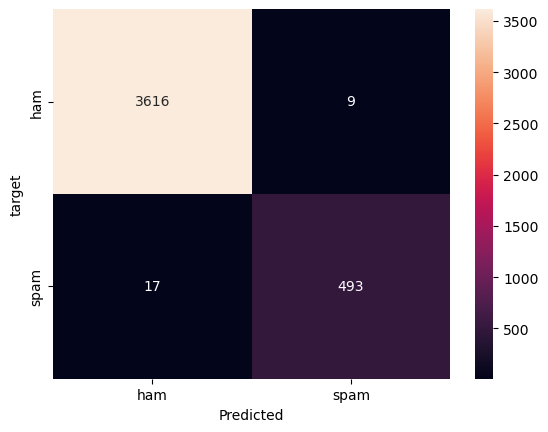

In [20]:
#creating_function-for_plotting_confussion_matrix
def plot_cm(cm):
    classes= ['ham','spam']
    df_cm=pd.DataFrame(cm,index=classes,columns=classes)
    ax=sn.heatmap(df_cm,annot=True,fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("target")
plot_cm(cm) 

# The confusion matrix above illustrates the model's performance on the training set.